<h1>Importação de bibliotecas</h1>

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer 

<h2>Geração de dados artificiais</h2>

In [93]:
# Classe 1
class1 = np.random.normal(loc=[0, 0], scale=0.1, size=(20, 2))
# Classe 2
class2 = np.random.normal(loc=[0, 1], scale=0.1, size=(20, 2))
# Classe 3
class3 = np.random.normal(loc=[1, 0.5], scale=0.1, size=(20, 2))

<h3>Armazenamento dos dados artificiais em um arquivo .csv, para caso de apresentação em relatórios.</h3>

In [94]:
data = np.vstack((class1, class2, class3))
labels = np.array([1]*20 + [2]*20 + [3]*20)
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['label'] = labels
df.to_csv('artificial_data.csv', index=False)

<h3>Exibir dados gerados</h3>

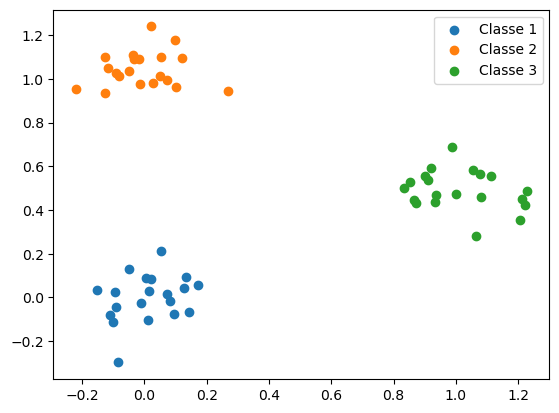

In [95]:
# Plotar os dados
plt.scatter(class1[:, 0], class1[:, 1], label='Classe 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Classe 2')
plt.scatter(class3[:, 0], class3[:, 1], label='Classe 3')
plt.legend()
plt.show()

<h2>Importação dos Conjuntos de Dados: Flor Irís, Coluna Vertebral, 
Breast Cance;e  Dermatology </h2>

In [96]:
# Carregando o conjunto de dados Iris
iris = fetch_ucirepo(id=53)
X_iris = iris.data.features
y_iris = iris.data.targets

# Carregando o conjunto de dados Coluna Vertebral
vertebral_column = fetch_ucirepo(id=212)
X_vertebral = vertebral_column.data.features
y_vertebral = vertebral_column.data.targets

# Carregando o conjunto de dados Breast Cancer
breast_cancer = fetch_ucirepo(id=14)
X_breast_cancer = breast_cancer.data.features
y_breast_cancer = breast_cancer.data.targets

# Carregando o conjunto de dados Dermatology
dermatology = fetch_ucirepo(id=33)
X_dermatology = dermatology.data.features
y_dermatology = dermatology.data.targets

<h3>Armazenamento dos dados carregados em um arquivo .csv, para caso de apresentação em relatórios.</h3>

In [97]:
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
df_iris['label'] = y_iris
df_iris.to_csv('iris_data.csv', index=False)

In [98]:
df_vertebral = pd.DataFrame(X_vertebral, columns=vertebral_column.feature_names)
df_vertebral['label'] = y_vertebral
df_vertebral.to_csv('vertebral_column_data.csv', index=False)

In [99]:
df_breast_cancer = pd.DataFrame(X_breast_cancer, columns=breast_cancer.feature_names)
df_breast_cancer['label'] = y_breast_cancer
df_breast_cancer.to_csv('breast_cancer_data.csv', index=False)

In [100]:
df_dermatology = pd.DataFrame(X_dermatology, columns=dermatology.feature_names)
df_dermatology['label'] = y_dermatology
df_dermatology.to_csv('dermatology_data.csv', index=False)

<h2>Implementação dos Classificadores Bayesianos Gaussianos</h2>

In [101]:
# Carregar os dados artificiais
df = pd.read_csv('artificial_data.csv')
X_artificial = df[['x1', 'x2']].values
y_artificial = df['label'].values
# Função para treinar e testar LDA e QDA
def train_test_lda_qda(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    lda = LDA()
    qda = QDA()
    
    lda.fit(X_train, y_train)
    qda.fit(X_train, y_train)
    
    y_pred_lda = lda.predict(X_test)
    y_pred_qda = qda.predict(X_test)
    
    acc_lda = accuracy_score(y_test, y_pred_lda)
    acc_qda = accuracy_score(y_test, y_pred_qda)
    
    cm_lda = confusion_matrix(y_test, y_pred_lda)
    cm_qda = confusion_matrix(y_test, y_pred_qda)
    
    return acc_lda, acc_qda, cm_lda, cm_qda

<h3>Testando com o conjunto de dados Artificial)</h3>

In [102]:
acc_lda, acc_qda, cm_lda, cm_qda = train_test_lda_qda(X_artificial, y_artificial)
print(f"Artificial I - Acc LDA: {acc_lda:.2f}, Acc QDA: {acc_qda:.2f}")

Artificial I - Acc LDA: 1.00, Acc QDA: 1.00


Essa acuracia de 100% das superficies de decisões tanto quadraticas como lineares, se deve a forma como os dados estão agrupados e ordenados.

<h2>Função de plotagem de superficie de decisão</h2>

In [103]:
def plot_decision_surface(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

<h2>Plotagem das Superfícies de Decisão, dados artificiais</h2>

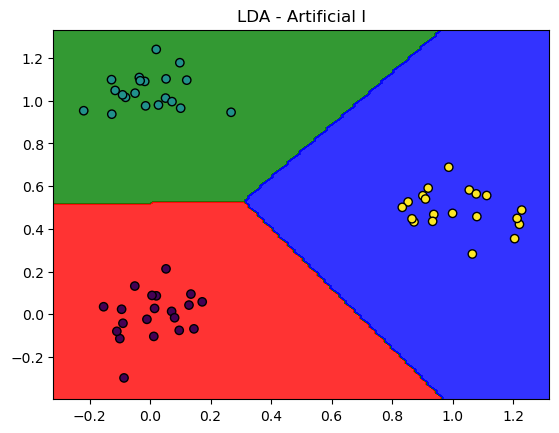

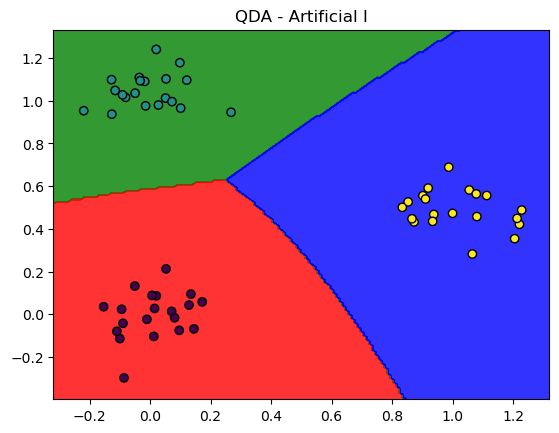

In [104]:
# Superfície de decisão para o conjunto de dados Artificial I com LDA
lda = LDA()
lda.fit(X_artificial, y_artificial)
plot_decision_surface(X_artificial, y_artificial, lda, "LDA - Artificial I")

# Superfície de decisão para o conjunto de dados Artificial I com QDA
qda = QDA()
qda.fit(X_artificial, y_artificial)
plot_decision_surface(X_artificial, y_artificial, qda, "QDA - Artificial I")

In [105]:
# Função para codificar as variáveis categóricas
def encode_categorical_columns(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders

# Função para treinar e avaliar os modelos
def evaluate_classifiers(X, y, dataset_name):
    print(f"\n--- Avaliação no dataset: {dataset_name} ---")
    
    # Dividindo os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Implementando LDA
    lda = LDA()
    lda.fit(X_train, y_train)
    y_pred_lda = lda.predict(X_test)
    
    # Resultados do LDA
    print("\nResultados do LDA:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lda)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
    print("Classification Report:\n", classification_report(y_test, y_pred_lda))
    
    # Implementando QDA
    qda = QDA()
    qda.fit(X_train, y_train)
    y_pred_qda = qda.predict(X_test)
    
    # Resultados do QDA
    print("\nResultados do QDA:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_qda)}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_qda))
    print("Classification Report:\n", classification_report(y_test, y_pred_qda))

# Codificando as colunas categóricas do dataset Breast Cancer
X_breast_cancer_encoded, label_encoders = encode_categorical_columns(X_breast_cancer)

# Substituindo valores NaN pela mediana das colunas
imputer = SimpleImputer(strategy='median')
X_dermatology_imputed = imputer.fit_transform(X_dermatology)

# Avaliando os modelos nos diferentes conjuntos de dados
# Dataset Iris
evaluate_classifiers(X_iris, y_iris, "Iris")

# Dataset Coluna Vertebral
evaluate_classifiers(X_vertebral, y_vertebral, "Coluna Vertebral")

# Dataset Breast Cancer
evaluate_classifiers(X_breast_cancer_encoded, y_breast_cancer, "Breast Cancer")

# Dataset Dermatology
evaluate_classifiers(X_dermatology_imputed, y_dermatology, "Dermatology")


C:\Users\jorge\AppData\Local\Temp\ipykernel_6576\4244189337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\jorge\AppData\Local\Temp\ipykernel_6576\4244189337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\jorge\AppData\Local\Temp\ipykernel_6576\4244189337.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu


--- Avaliação no dataset: Iris ---

Resultados do LDA:
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Resultados do QDA:
Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00 

C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jorge\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


A acurácia de 100% nos modelos LDA e QDA ao avaliar o dataset Iris pode indicar que o modelo está bem ajustado para esse conjunto de dados. O Iris é um dataset relativamente simples e bem separável, o que pode levar a resultados perfeitos em alguns classificadores, especialmente quando as classes são linearmente ou quase linearmente separáveis.

Análise dos Resultados
Simplicidade do Dataset:

O Iris possui três classes com características que são, em grande parte, linearmente separáveis, o que faz com que tanto LDA quanto QDA funcionem excepcionalmente bem.
Além disso, como o dataset é pequeno, é possível que a divisão treino/teste tenha resultado em conjuntos bem representativos, levando a alta acurácia.
Possibilidade de Overfitting:

Como LDA e QDA são métodos baseados em probabilidade e utilizam toda a informação dos dados para estimar os parâmetros, há menos risco de overfitting, mas isso ainda deve ser considerado, especialmente em datasets maiores e mais complexos.
Verificação Cruzada:

Para validar se essa acurácia se mantém robusta, seria interessante utilizar validação cruzada (cross-validation) para verificar a consistência dos resultados.
Validação Cruzada para Iris
Podemos implementar uma validação cruzada para garantir que a acurácia de 100% não seja um acaso devido à divisão dos dados:

In [106]:
# Função para realizar validação cruzada
def cross_validation_evaluation(X, y, classifier, name):
    y = y.values.ravel()  # Converte y para um array unidimensional
    scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation
    print(f"\nValidação Cruzada - {name}")
    print(f"Acurácia Média: {np.mean(scores):.4f}")
    print(f"Acurácia (Desvio Padrão): {np.std(scores):.4f}")

# Validação cruzada para LDA
cross_validation_evaluation(X_iris, y_iris, LDA(), "LDA - Iris")

# Validação cruzada para QDA
cross_validation_evaluation(X_iris, y_iris, QDA(), "QDA - Iris")



Validação Cruzada - LDA - Iris
Acurácia Média: 0.9800
Acurácia (Desvio Padrão): 0.0267

Validação Cruzada - QDA - Iris
Acurácia Média: 0.9800
Acurácia (Desvio Padrão): 0.0267


Os resultados da validação cruzada mostram uma acurácia média de 98% para ambos os modelos, LDA e QDA, com um desvio padrão de aproximadamente 2.67%. Isso é uma diferença em relação à acurácia de 100% obtida anteriormente e é um resultado mais realista.

Análise dos Resultados Diferença na Acurácia:

Validação cruzada: A validação cruzada divide o dataset em várias partes e treina/testa o modelo em diferentes combinações, o que dá uma estimativa mais robusta do desempenho do modelo. Essa abordagem reduz o risco de sobreajuste (overfitting) que pode ocorrer se apenas uma única divisão dos dados for usada. Acurácia de 100%: A acurácia de 100% em uma única divisão pode ter sido resultado de uma divisão de dados particularmente favorável, onde as amostras de treino e teste eram muito similares. Mesma Acurácia para LDA e QDA:

A similaridade nos resultados de LDA e QDA sugere que, para o dataset Iris, tanto o discriminante linear quanto o quadrático conseguem capturar a separação entre as classes de forma eficaz. Isso pode ocorrer porque as classes no Iris são relativamente bem separadas, e ambos os métodos conseguem modelar essa separação. Desvio Padrão:

O desvio padrão de aproximadamente 2.67% indica que há alguma variação na performance dos modelos dependendo da divisão dos dados, mas essa variação é relativamente pequena.

Colunas do dataset Iris: Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')


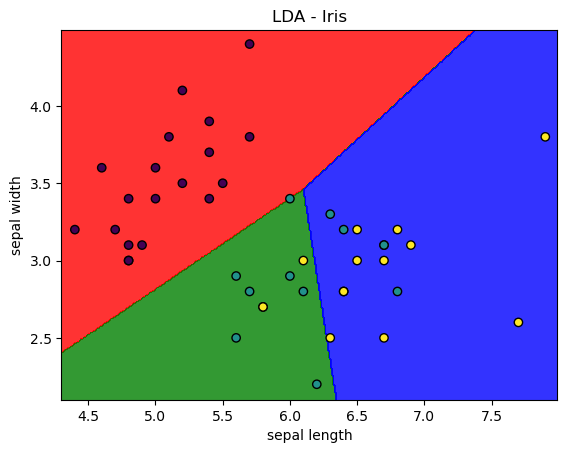

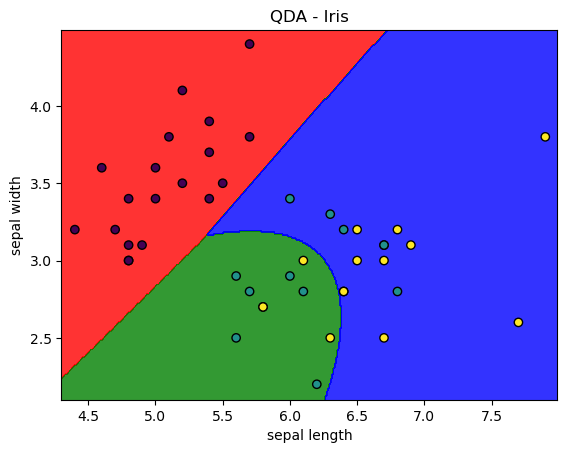

Colunas do dataset Coluna Vertebral: Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'label'],
      dtype='object')


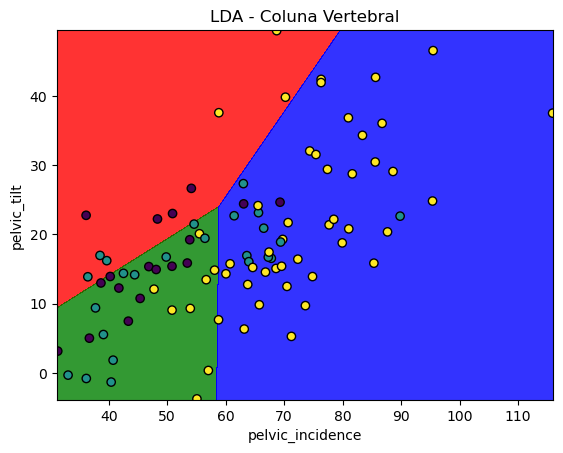

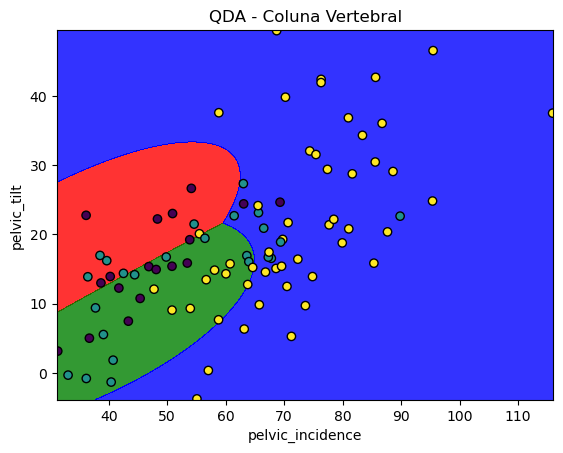

In [107]:
def plot_decision_surface(X, y, model, title, feature_names):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

def process_and_plot(file_path, features, label_column, dataset_name):
    # Carregar o dataset
    df = pd.read_csv(file_path)
    
    # Verificar as colunas
    print(f"Colunas do dataset {dataset_name}:", df.columns)
    
    # Selecionar atributos e rótulos
    X = df[features].values
    y = df[label_column].values
    
    # Codificar rótulos se necessário
    le = LabelEncoder()
    y = le.fit_transform(y)
    
    # Dividir em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Treinar e plotar para LDA
    lda = LDA()
    lda.fit(X_train, y_train)
    plot_decision_surface(X_test, y_test, lda, f"LDA - {dataset_name}", features)
    
    # Treinar e plotar para QDA
    qda = QDA()
    qda.fit(X_train, y_train)
    plot_decision_surface(X_test, y_test, qda, f"QDA - {dataset_name}", features)

# Definir parâmetros
features_iris = ['sepal length', 'sepal width']
label_column_iris = 'label'

features_vertebral = ['pelvic_incidence', 'pelvic_tilt']
label_column_vertebral = 'label'

# Processar e plotar para o dataset Iris
process_and_plot('iris_data.csv', features_iris, label_column_iris, "Iris")

# Processar e plotar para o dataset Coluna Vertebral
process_and_plot('vertebral_column_data.csv', features_vertebral, label_column_vertebral, "Coluna Vertebral")
